In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fastprogress import progress_bar
import math

import jlinops
import sampi

# Set up a toy problem

In [2]:
ground_truth = jlinops.cameraman()
noise_sigma = 0.05
blur_sigma = 1.0
noise_var = noise_sigma**2
np.random.seed(0)
F = jlinops.Gaussian2DBlurOperator(ground_truth.shape, blur_sigma=blur_sigma)
noisy_signal = F.matvec_shaped(ground_truth) + noise_sigma*np.random.normal(size=ground_truth.shape)

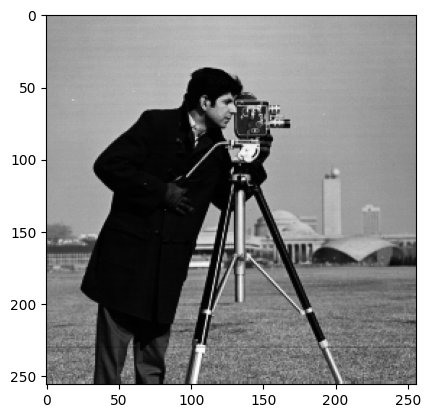

In [3]:
plt.imshow(ground_truth, cmap="gray")
plt.show()

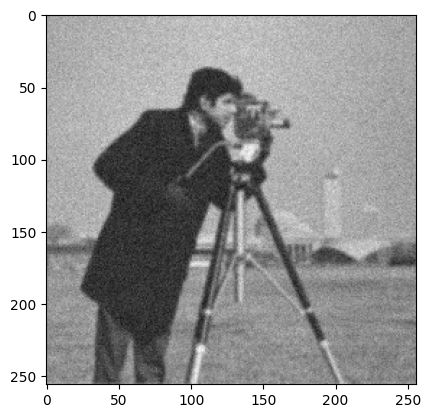

In [4]:
plt.imshow(noisy_signal, cmap="gray")
plt.show()

# Build objective function

In [5]:
# Data likelihood term
f = sampi.GaussianDataLikelihood(F, noisy_signal.flatten(), v=noise_var)

In [6]:
# Regularization term
g = sampi.TVNeumann2DPenalty(noisy_signal.shape, reg_lam=1e-2)

In [7]:
obj = sampi.CompositeModelObjectiveFunction(f, g)

In [8]:
print(f"L = {f.L}")

L = 420.00000000000034


# Instantiate solver

In [9]:
solver = sampi.ProximalGradientSolver(obj)

In [10]:
solver_data = solver.solve(iterations=100, L=None)

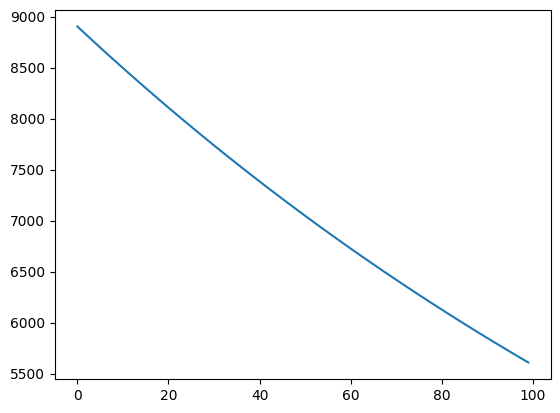

In [11]:
plt.plot(solver_data["obj_vals"])
plt.show()

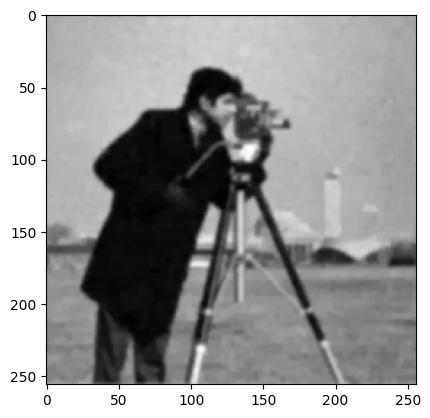

In [12]:
plt.imshow(solver_data["result"].reshape(ground_truth.shape), cmap="gray")
plt.show()

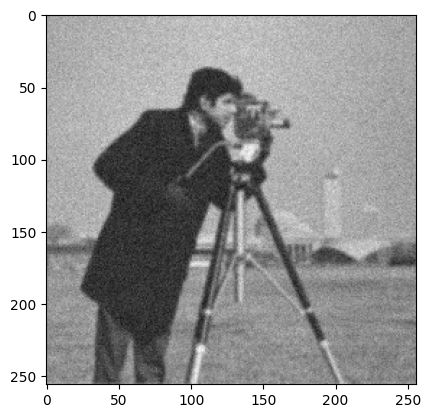

In [13]:
plt.imshow(noisy_signal, cmap="gray")
plt.show()

In [14]:
fista_solver = sampi.FISTASolver(obj)

In [16]:
fista_solver_data = fista_solver.solve(iterations=100, L=None)

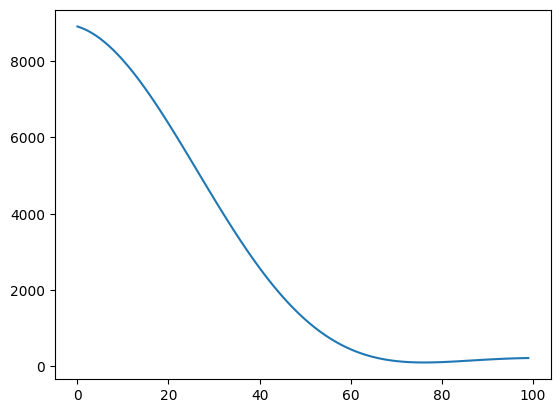

In [17]:
plt.plot(fista_solver_data["obj_vals"])
plt.show()

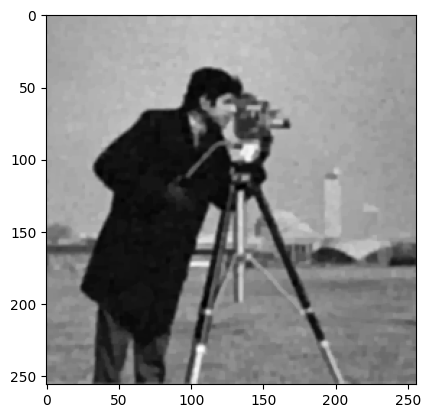

In [18]:
plt.imshow(fista_solver_data["result"].reshape(ground_truth.shape), cmap="gray")
plt.show()

In [19]:
mfista_solver = sampi.MFISTASolver(obj)

In [20]:
mfista_solver_data = mfista_solver.solve(iterations=100, L=None)

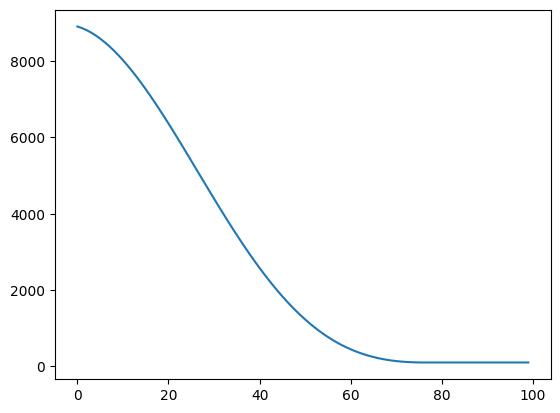

In [21]:
plt.plot(mfista_solver_data["obj_vals"])
plt.show()

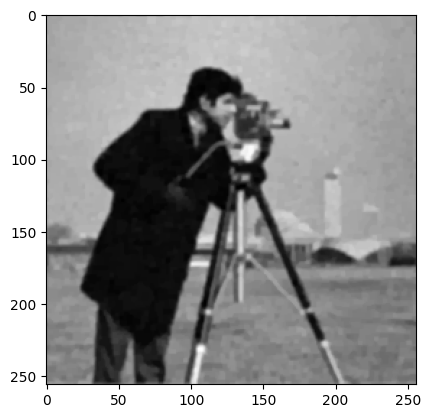

In [22]:
plt.imshow(mfista_solver_data["result"].reshape(ground_truth.shape), cmap="gray")
plt.show()

# Compare

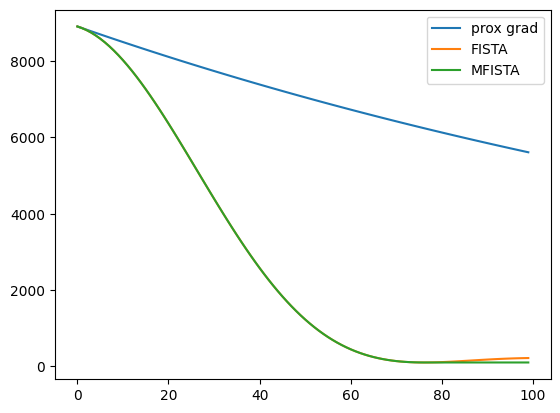

In [23]:
plt.plot(solver_data["obj_vals"], label="prox grad")
plt.plot(fista_solver_data["obj_vals"], label="FISTA")
plt.plot(mfista_solver_data["obj_vals"], label="MFISTA")
plt.legend()
plt.show()

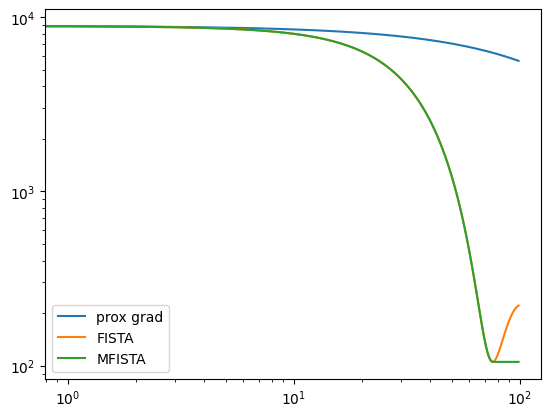

In [26]:
plt.loglog(solver_data["obj_vals"], label="prox grad")
plt.loglog(fista_solver_data["obj_vals"], label="FISTA")
plt.loglog(mfista_solver_data["obj_vals"], label="MFISTA")
plt.legend()
plt.show()

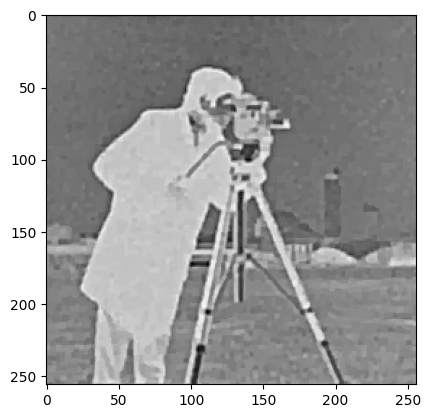

In [24]:
plt.imshow(mfista_solver_data["result"].reshape(ground_truth.shape) - fista_solver_data["result"].reshape(ground_truth.shape), cmap="gray")
plt.show()

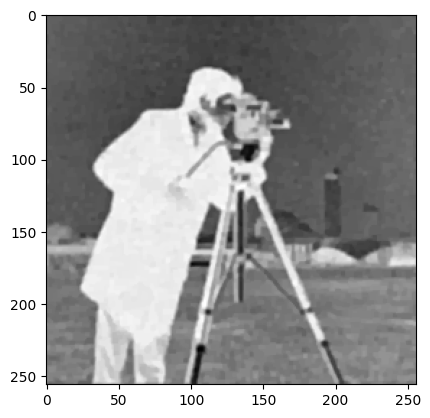

In [25]:
plt.imshow(solver_data["result"].reshape(ground_truth.shape) - fista_solver_data["result"].reshape(ground_truth.shape), cmap="gray")
plt.show()